# Task 2.1 + 2.2: Classification with RNN

In [1]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

import torch
torch.manual_seed(103)

## Specify parameters

### Manually set config

In [2]:
kwargs = {
    # Main mode
    "mode": "classification",  # prediction or classification

    # Model config
    "model": "RNN",  # LSTM or RNN
    # "hidden_dim": 32,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 1000,
    "lr": 0.01,
    "batch_size": 128
}

config = Config(**kwargs)

In [3]:
# Save config
# config.save("default_class_rnn")

### Load saved config

In [4]:
config = load_train_config("config_default_class_rnn")
print(config)

Config loaded from: config/config_default_class_rnn.json
CONFIG:
  mode: classification
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: RNN
  input_dim: 96
  hidden_dim: 128
  output_dim: 10
  num_layers: 1
  dropout: 0.0
  epochs: 1000
  lr: 0.3
  batch_size: 128
  eval_steps: 50


## Run FL training

In [5]:
x, y, splits = get_data(config)
x_train, x_val, x_test, y_train, y_val, y_test = splits

In [6]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 2.3105, val loss: 2.3044, val acc: 0.0775
  Epoch: 50,  train loss: 2.2949, val loss: 2.2902, val acc: 0.1553
  Epoch: 100,  train loss: 2.2787, val loss: 2.2587, val acc: 0.3065
  Epoch: 150,  train loss: 2.2123, val loss: 2.1526, val acc: 0.3201
  Epoch: 200,  train loss: 2.1054, val loss: 1.9999, val acc: 0.3615
  Epoch: 250,  train loss: 2.0462, val loss: 1.8360, val acc: 0.4099
  Epoch: 300,  train loss: 1.8880, val loss: 1.6803, val acc: 0.4358
  Epoch: 350,  train loss: 1.9368, val loss: 1.5778, val acc: 0.4734
  Epoch: 400,  train loss: 1.8558, val loss: 1.4991, val acc: 0.5090
  Epoch: 450,  train loss: 1.7364, val loss: 1.4864, val acc: 0.4862
  Epoch: 500,  train loss: 1.7509, val loss: 1.3887, val acc: 0.5249
  Epoch: 550,  train loss: 1.8433, val loss: 1.3646, val acc: 0.5366
  Epoch: 600,  train loss: 1.7227, val loss: 1.3043, val acc: 0.5557
  Epoch: 650,  train loss: 1.6216, val loss: 1.2975, val acc: 0.5479
  Epoch: 700,  train loss: 1.7

### Analysis

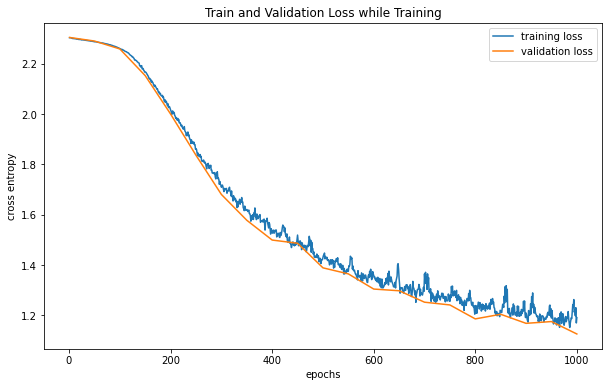

In [7]:
fl.plot_training_loss()

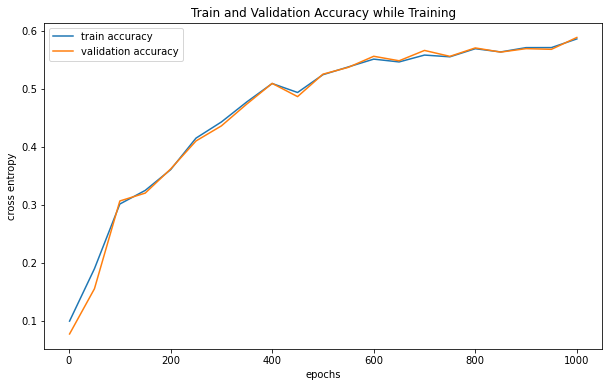

In [8]:
fl.plot_training_accuracy()

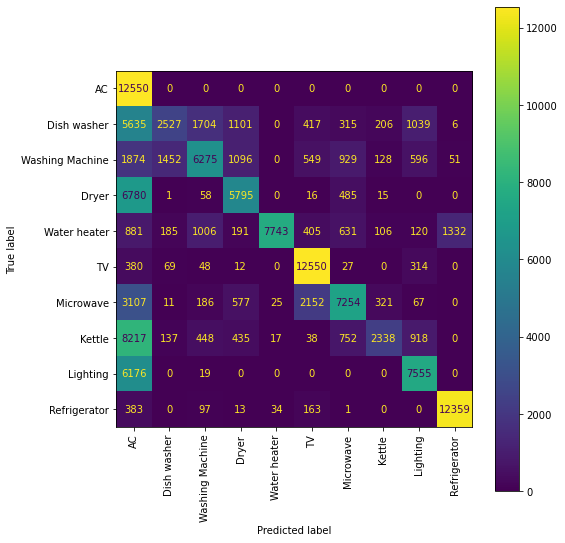

In [9]:
# Train set confusion matrix
fl.plot_confusion_matrix(x_train, y_train)

In [10]:
fl.evaluation_metrics(x_test, y_test)

METRICS:
  Test cross entropy: 1.2026
                 precision    recall  f1-score   support

             AC       0.34      1.00      0.51      4650
    Dish washer       0.55      0.18      0.27      3700
Washing Machine       0.62      0.47      0.53      3600
          Dryer       0.64      0.42      0.51      3650
   Water heater       0.99      0.61      0.75      3750
             TV       0.74      0.95      0.83      3250
      Microwave       0.69      0.54      0.60      3500
         Kettle       0.74      0.18      0.29      3550
       Lighting       0.67      0.55      0.61      3300
   Refrigerator       0.88      0.90      0.89      3550

       accuracy                           0.59     36500
      macro avg       0.68      0.58      0.58     36500
   weighted avg       0.67      0.59      0.57     36500



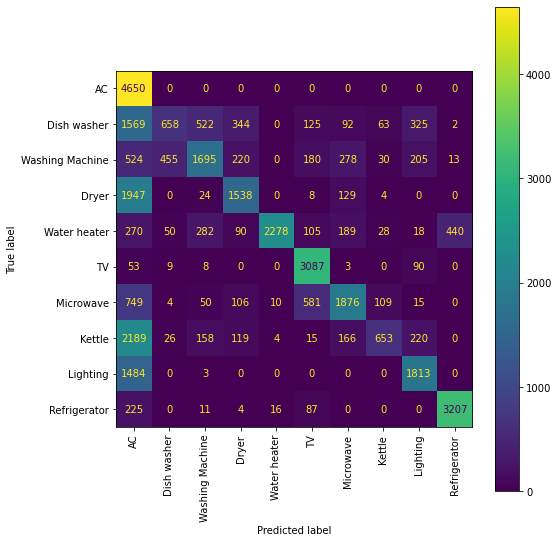

In [11]:
# Train set confusion matrix
fl.plot_confusion_matrix(x_test, y_test)

## Run training with aggregated data

In [12]:
x, y, splits = get_data(config)
x_train, x_val, x_test, y_train, y_val, y_test = splits

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [13]:
fl_agg = FederatedLearning(config)
fl_agg.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 2.3106, val loss: 2.2976, val acc: 0.1040
  Epoch: 50,  train loss: 2.2890, val loss: 2.2893, val acc: 0.1851
  Epoch: 100,  train loss: 2.2605, val loss: 2.2601, val acc: 0.1784
  Epoch: 150,  train loss: 2.1695, val loss: 2.1629, val acc: 0.2151
  Epoch: 200,  train loss: 2.0213, val loss: 2.0103, val acc: 0.3292
  Epoch: 250,  train loss: 1.8405, val loss: 1.9273, val acc: 0.3972
  Epoch: 300,  train loss: 1.7407, val loss: 1.7251, val acc: 0.3947
  Epoch: 350,  train loss: 1.6611, val loss: 1.5916, val acc: 0.4542
  Epoch: 400,  train loss: 1.4207, val loss: 1.5375, val acc: 0.4486
  Epoch: 450,  train loss: 1.4770, val loss: 1.4484, val acc: 0.4958
  Epoch: 500,  train loss: 1.4432, val loss: 1.4059, val acc: 0.5216
  Epoch: 550,  train loss: 1.2900, val loss: 1.3598, val acc: 0.5270
  Epoch: 600,  train loss: 1.3546, val loss: 1.3507, val acc: 0.5186
  Epoch: 650,  train loss: 1.3617, val loss: 1.4148, val acc: 0.4860
  Epoch: 700,  train loss: 1.3

### Analysis

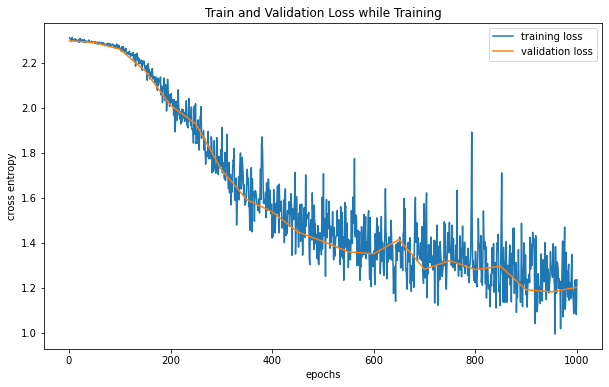

In [14]:
fl_agg.plot_training_loss()

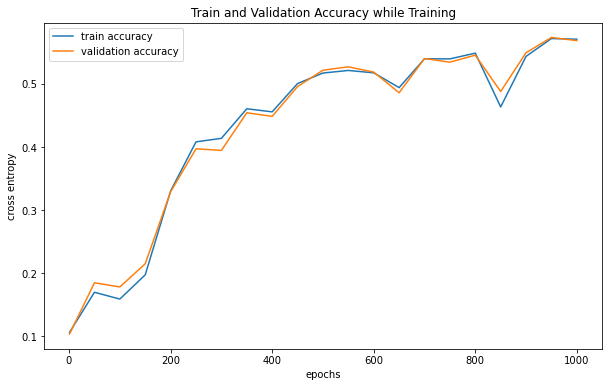

In [15]:
fl_agg.plot_training_accuracy()

In [16]:
fl_agg.evaluation_metrics(x_test, y_test)

METRICS:
  Test cross entropy: 1.2578
                 precision    recall  f1-score   support

             AC       0.33      1.00      0.50      4650
    Dish washer       0.56      0.11      0.18      3700
Washing Machine       0.64      0.44      0.52      3600
          Dryer       0.63      0.45      0.52      3650
   Water heater       0.94      0.64      0.76      3750
             TV       0.85      0.79      0.82      3250
      Microwave       0.67      0.56      0.61      3500
         Kettle       0.50      0.27      0.35      3550
       Lighting       0.59      0.55      0.57      3300
   Refrigerator       0.92      0.86      0.89      3550

       accuracy                           0.58     36500
      macro avg       0.66      0.57      0.57     36500
   weighted avg       0.65      0.58      0.57     36500



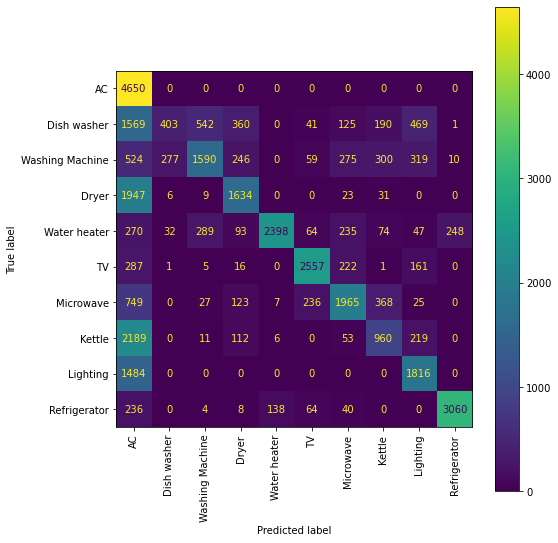

In [17]:
fl_agg.plot_confusion_matrix(x_test, y_test)